<a href="https://colab.research.google.com/github/rpark3/ECON3916-Statistical-Machine-Learning/blob/main/Assignment%202/Econ_3916_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Manual DGP Simulation
normal_traffic = np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate([normal_traffic, spike_traffic])

In [4]:
def calculate_mad(data):
  data = np.array(data)
  median = np.median(data)
  abs_dev = np.abs(data - median)
  mad = np.median(abs_dev)
  return mad

In [5]:
standard_dev = np.std(latency_logs)
mad_latency = calculate_mad(latency_logs)

In [6]:
print("Standard Deviation:", standard_dev)
print("MAD:", mad_latency)

Standard Deviation: 382.31743135645803
MAD: 8.0


In [7]:
def bayesian_audit(prior, sensitivity, specificity):
  Cheat_flagged = sensitivity * prior
  NoCheat_flagged = (1-specificity) * (1-prior)
  posterior_prob = Cheat_flagged / (Cheat_flagged + NoCheat_flagged)
  return posterior_prob

In [8]:
sensitivity = 0.98
specificity = 0.98

In [9]:
#scenario A
Bootcamp = bayesian_audit(0.5, sensitivity, specificity)
print("Bootcamp Probability that student flagged cheated:", Bootcamp,"%")

#scenario B
Econ_Class = bayesian_audit(0.05, sensitivity, specificity)
print("Economics Class Probability that student flagged cheated:", Econ_Class, "%")

#scenario C
Honors_Seminar = bayesian_audit(0.001, sensitivity, specificity)
print("Honors Seminar Probability that student flagged cheated", Honors_Seminar, "%")

Bootcamp Probability that student flagged cheated: 0.98 %
Economics Class Probability that student flagged cheated: 0.7205882352941175 %
Honors Seminar Probability that student flagged cheated 0.04675572519083965 %


In [10]:
# Chi-Square Formula: Sum( (Observed - Expected)^2 / Expected )
observed = np.array([50250, 49750])
expected = np.array([50000, 50000])
# Write the calculation loop...
chi_square = np.sum((observed - expected)**2 / expected)
print(chi_square)

if chi_square > 3.84:
  print("The experiment is INVALID due to engineering bias")
else:
  print("No evidence of an app crash")

2.5
No evidence of an app crash


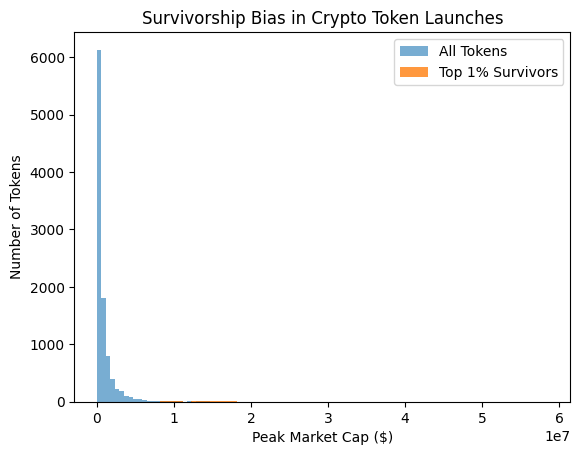

Mean Market Cap (All Tokens): $ 936723.29
Mean Market Cap (Top 1% Survivors): $ 15549004.95


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1. Simulate 10,000 launches
# ---------------------------
np.random.seed(42)
n_tokens = 10_000

# Pareto distribution (power law)
# Shape parameter controls heaviness of tail
shape = 2.0
peak_market_caps = np.random.pareto(shape, n_tokens) * 1e6  # scale to dollars

# ---------------------------
# 2. Create DataFrames
# ---------------------------
df_all = pd.DataFrame({"Peak Market Cap": peak_market_caps})

# Top 1% survivors
threshold = np.percentile(peak_market_caps, 99)
df_survivors = df_all[df_all["Peak Market Cap"] >= threshold]

# ---------------------------
# 3. Dual histogram visualization
# ---------------------------
plt.figure()

plt.hist(df_all["Peak Market Cap"], bins=100, alpha=0.6, label="All Tokens")
plt.hist(df_survivors["Peak Market Cap"], bins=50, alpha=0.8, label="Top 1% Survivors")

plt.xlabel("Peak Market Cap ($)")
plt.ylabel("Number of Tokens")
plt.title("Survivorship Bias in Crypto Token Launches")
plt.legend()

plt.show()

# ---------------------------
# 4. Evaluate survivorship bias
# ---------------------------
mean_all = df_all["Peak Market Cap"].mean()
mean_survivors = df_survivors["Peak Market Cap"].mean()

print("Mean Market Cap (All Tokens): $", round(mean_all, 2))
print("Mean Market Cap (Top 1% Survivors): $", round(mean_survivors, 2))